In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('/work/datalatih_baru.xlsx')

/tmp/ipykernel_80/1856311698.py:1: DtypeWarning: Columns (26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('/work/Daily_Cuaca_Kebumen.csv')


In [7]:
data.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,...,17121.000000,16407.000000,13093.000000,16700.000000,16695.000000,5479.000000,5479.000000,5479.000000,1087.000000,17121.000000
mean,29.977749,24.762790,27.084455,35.016114,24.911084,29.429234,23.694479,82.315126,8.965808,58.053892,...,16.651434,159.296587,1011.163080,72.508671,10.647553,216.319566,18.674119,7.532031,19.770009,0.483781
std,1.716596,1.344498,1.219990,3.475373,1.842660,2.545827,1.098086,4.442787,21.330792,49.348563,...,8.037371,63.588276,1.869502,16.539230,2.547669,59.172609,5.113399,1.896949,11.830311,0.288673
min,21.900000,2.600000,20.400000,21.900000,-0.900000,19.800000,8.400000,46.000000,0.000000,0.000000,...,0.000000,0.000000,962.100000,0.000000,1.000000,10.000000,1.000000,1.000000,10.000000,0.000000
25%,28.900000,24.100000,26.300000,32.800000,24.100000,27.600000,23.100000,79.700000,0.000000,0.000000,...,11.200000,117.500000,1010.000000,61.700000,9.000000,176.550000,15.200000,6.000000,10.000000,0.250000
50%,30.100000,24.900000,27.200000,35.400000,24.900000,29.500000,23.900000,82.500000,0.700000,100.000000,...,15.500000,130.100000,1011.200000,75.000000,10.200000,226.900000,19.600000,8.000000,10.000000,0.500000
75%,31.200000,25.400000,27.900000,37.400000,25.400000,31.200000,24.500000,85.000000,7.300000,100.000000,...,22.300000,200.000000,1012.400000,85.000000,11.600000,260.300000,22.500000,9.000000,30.000000,0.750000
max,55.700000,33.700000,36.000000,55.700000,41.700000,41.700000,26.500000,98.800000,356.800000,100.000000,...,133.600000,360.000000,1024.100000,100.000000,37.000000,354.900000,30.900000,10.000000,75.000000,0.980000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17121 entries, 0 to 17120
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              17121 non-null  object 
 1   datetime          17121 non-null  object 
 2   tempmax           16700 non-null  float64
 3   tempmin           16700 non-null  float64
 4   temp              16700 non-null  float64
 5   feelslikemax      16700 non-null  float64
 6   feelslikemin      16700 non-null  float64
 7   feelslike         16700 non-null  float64
 8   dew               16700 non-null  float64
 9   humidity          16700 non-null  float64
 10  precip            16700 non-null  float64
 11  precipprob        16700 non-null  float64
 12  precipcover       17121 non-null  float64
 13  preciptype        9765 non-null   object 
 14  snow              9089 non-null   float64
 15  snowdepth         9089 non-null   float64
 16  windgust          1087 non-null   float6

In [9]:
# Mengonversi nilai precipprob: 0 menjadi "No", 100 menjadi "Yes"
data3['precipprob'] = data3['precipprob'].apply(lambda x: "Yes" if x == 100 else "No")

# Mengonversi ke tipe data boolean
data3['precipprob'] = data3['precipprob'].map({"Yes": True, "No": False})

# Mengecek hasil
print(data3['precipprob'].head())

0    False
1    False
2    False
3    False
4    False
Name: precipprob, dtype: bool


In [10]:
data3

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Kebumen, Indonesia",1978-02-16,32.1,25.1,28.1,39.3,25.1,31.4,24.8,83.5,...,NaN,NaN,NaN,1978-02-16T05:45:06,1978-02-16T18:05:40,0.28,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
1,"Kebumen, Indonesia",1978-02-17,31.1,25.1,27.9,37.9,25.1,31.8,24.9,84.4,...,NaN,NaN,NaN,1978-02-17T05:45:14,1978-02-17T18:05:24,0.31,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
2,"Kebumen, Indonesia",1978-02-18,32.1,26.1,29.0,40.8,26.1,33.6,25.5,82.7,...,NaN,NaN,NaN,1978-02-18T05:45:22,1978-02-18T18:05:08,0.34,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
3,"Kebumen, Indonesia",1978-02-19,33.1,25.1,28.5,39.4,25.1,32.2,25.1,83.2,...,NaN,NaN,NaN,1978-02-19T05:45:29,1978-02-19T18:04:50,0.38,Overcast,Cloudy skies throughout the day.,cloudy,96805099999
4,"Kebumen, Indonesia",1978-02-20,31.1,24.1,27.1,44.4,24.1,30.7,23.1,85.2,...,NaN,NaN,NaN,1978-02-20T05:45:35,1978-02-20T18:04:32,0.41,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17116,Kebumen,2024-12-27,32.7,25.1,28.5,39.5,25.1,32.2,24.9,81.7,...,15.6,6.0,10.0,2024-12-27T05:25:26,2024-12-27T17:59:28,0.88,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
17117,Kebumen,2024-12-28,27.8,25.4,26.6,32.5,25.4,28.4,23.6,83.9,...,8.1,6.0,30.0,2024-12-28T05:25:57,2024-12-28T17:59:55,0.91,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"96805099999,remote"
17118,Kebumen,2024-12-29,26.2,25.0,25.5,26.2,25.0,25.5,22.5,83.7,...,3.4,2.0,10.0,2024-12-29T05:26:28,2024-12-29T18:00:22,0.94,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,remote
17119,Kebumen,2024-12-30,29.6,24.5,26.7,33.6,24.5,28.2,22.6,78.3,...,25.8,10.0,10.0,2024-12-30T05:27:00,2024-12-30T18:00:48,0.98,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,remote


In [11]:
data3.isnull().sum()

name                    0
datetime                0
tempmax               421
tempmin               421
temp                  421
feelslikemax          421
feelslikemin          421
feelslike             421
dew                   421
humidity              421
precip                421
precipprob              0
precipcover             0
preciptype           7356
snow                 8032
snowdepth            8032
windgust            16034
windspeed               0
winddir               714
sealevelpressure     4028
cloudcover            421
visibility            426
solarradiation      11642
solarenergy         11642
uvindex             11642
severerisk          16034
sunrise                 0
sunset                  0
moonphase               0
conditions            421
description           421
icon                  421
stations              421
dtype: int64

In [20]:
data3.drop(columns=['stations'], inplace=True)


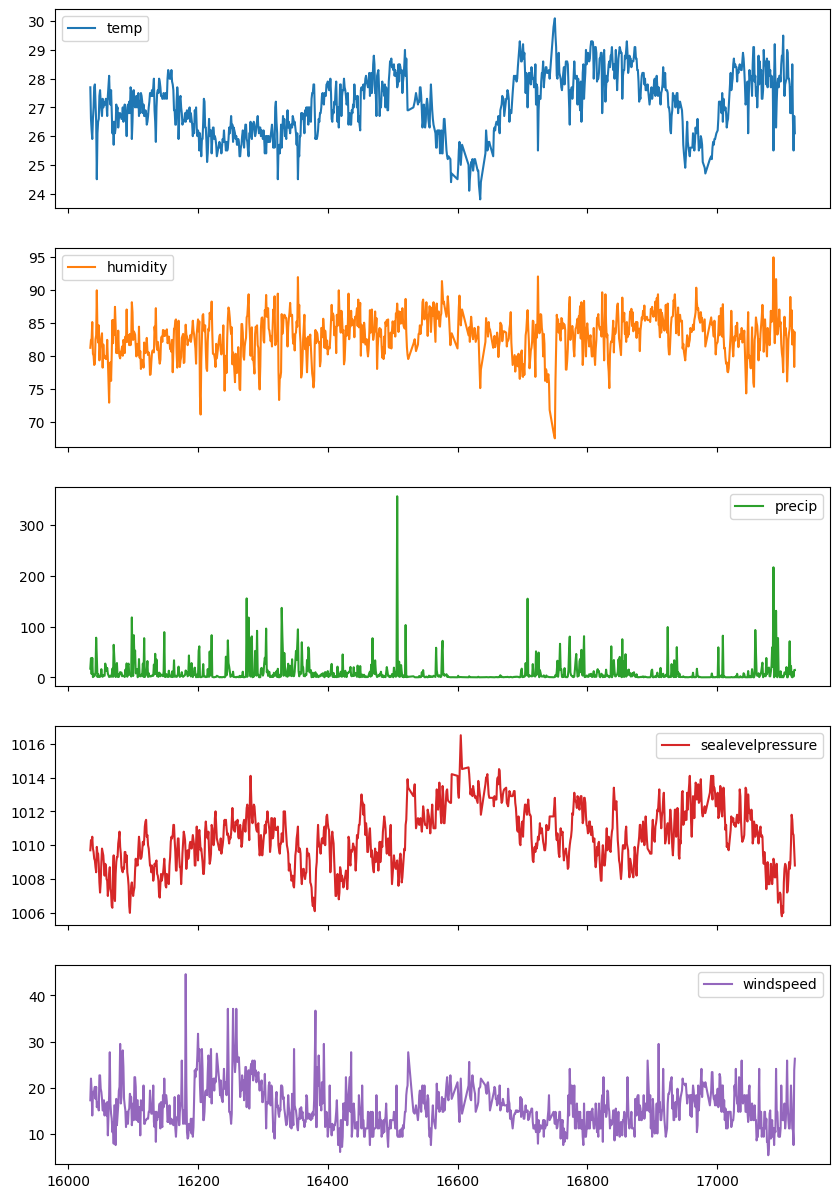

In [22]:
data3.plot(y=['temp', 'humidity','precip','sealevelpressure','windspeed'], subplots=True, figsize=(10, 15))
plt.show()

In [13]:
data3.dropna(inplace=True)

In [14]:
# Membagi variabel independen dan target
X = data3[[
    'temp', 
    'tempmax',
    'tempmin',
    'humidity',
    'sealevelpressure', 
    'windspeed',
    'winddir'
    ]]  # Variabel independen
y = data3['precipprob']  # Target (Curah Hujan)

In [15]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Standarisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Daftar model klasifikasi
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=50),
    'Random Forest': RandomForestClassifier(random_state=50),
    'Gradient Boosting': GradientBoostingClassifier(random_state=50),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Evaluasi semua model dan menyimpan hasil dalam bentuk tabel
results = []
for name, model in models.items():
    # Melatih model
    model.fit(X_train_scaled, y_train)
    
    # Prediksi
    y_pred = model.predict(X_test_scaled)
    
    # Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision (macro avg)': report['macro avg']['precision'],
        'Recall (macro avg)': report['macro avg']['recall'],
        'F1-Score (macro avg)': report['macro avg']['f1-score']
    })

# Menampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
print(results_df)

/root/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
                       Model  Accuracy  Precision (macro avg)  \

In [18]:
# Export DataFrame ke file Excel
#data3.to_excel("datalatih_baru.xlsx", index=False)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=200afad5-8991-4e20-8a55-8751c7aff3b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>